# is_cancelled Prediction- (classification ) - Tensorflow


TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. 
It is a symbolic math library, and is also used for machine learning applications such as neural networks . Here, we are
modeling 'is_cancelled' clasification prediction with TensorFlow - Keras API

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

X_train_norm_clf_pca = pd.read_pickle('X_train_norm_clf_pca.pkl')
y_train_clf = pd.read_pickle('y_train_clf.pkl')
X_test_norm_clf_pca = pd.read_pickle('X_test_norm_clf_pca.pkl')
y_test_clf = pd.read_pickle('y_test_clf.pkl')
#X_train_norm_clf_pca.head()
#y_test_clf.head()

In [3]:
"""convert to numpy.ndarray"""
X_train_arr=X_train_norm_clf_pca.values 
X_test_arr=X_test_norm_clf_pca.values
y_train_arr=y_train_clf.values
y_test_arr=y_test_clf.values

type(X_train_arr)

numpy.ndarray

In [63]:
#Define functions to calculate Recall, precision, f1 

from tensorflow.keras import backend as K
import warnings

warnings.filterwarnings('ignore')


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [64]:
#define function to plot : Model - Accuracy, Precision, Recall graph

from matplotlib.lines import Line2D 
def plot_accurracy_prec_roc(model_scores, model_names):
    N = 3
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    labels = model_names
    acc_score = []
    prec_score = []
    rec_score = []

    for idx in range(len(model_scores)):
        md_scores = model_scores[idx]
        acc_score.append(md_scores[0])
        prec_score.append(md_scores[1])
        rec_score.append(md_scores[2])

    acc_score = pd.DataFrame(acc_score)
    prec_score = pd.DataFrame(prec_score)
    rec_score = pd.DataFrame(rec_score)

    acc_score[:].plot(kind='bar', color='red', ax=ax, width=0.1, position=1, legend=None)
    prec_score[:].plot(kind='bar', color='yellow', ax=ax2, width=0.1, position=3, legend=None)
    rec_score[:].plot(kind='bar', color='blue', ax=ax3, width=0.1, position=2, legend=None)
    ax.set_xlabel('Models')
    ax.set_xticklabels(model_names, rotation=0)
    ax.set_ylabel('Accuracy')
    ax2.set_ylabel('Precision, recall')
    #ax3.set_ylabel('Recall')
    legend_elements = [
    Line2D([0], [0], marker='s', color='r', label='Accuracy',markerfacecolor='r', markersize=8,linestyle='-'),
    Line2D([0], [0], marker='s', color='b', label='Recall',markerfacecolor='b', markersize=8, linestyle='-'),
    Line2D([0], [0], marker='s', color='y', label='Precision',markerfacecolor='y', markersize=8, linestyle='-')]
    #ax.legend(handles=legend_elements, loc='top-right')
    ax.legend(handles=legend_elements, loc='best', bbox_to_anchor=(0.175, 0.5, 0.5, 0.5))
    plt.show()
    
    

Train an Multilayer Perceptron (MLP) with TensorFlow - Keras API. Looped model over different Activation functions ("elu", "relu", "selu", "sigmoid", "tanh") and generate scores -  Loss, Accuracy, F1, Recall, Precision 

In [65]:
"""Train an Multilayer Perceptron (MLP) with TensorFlow - Keras API"""

import tensorflow as tf
from matplotlib.lines import Line2D 

act_funcs = ["elu", "relu", "selu", "sigmoid", "tanh"]
lst_act=[]


for act in act_funcs:
    model = tf.keras.models.Sequential()
    tf.keras.layers.BatchNormalization()
    model.add(tf.keras.layers.Dense(256, input_shape=(70,), activation=act,use_bias=False))
    model.add(tf.keras.layers.Dropout(0.2))
    tf.keras.layers.BatchNormalization()
    model.add(tf.keras.layers.Dense(128,activation=act,use_bias=False))
    tf.keras.layers.BatchNormalization()
    model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation=act))

    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

    # fit the model
    history = model.fit(X_train_arr, y_train_arr, validation_split=0.3, epochs=5)

    # evaluate the model
    loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_arr, y_test_arr, verbose=0)
    
    lst_act.append([accuracy, precision, recall, f1_score, loss, act])
   

#lst_act

Train on 52619 samples, validate on 22551 samples
Epoch 1/5
52619/52619 [==============================] - 9s 178us/sample - loss: 0.9254 - acc: 0.7703 - f1_m: 0.6111 - precision_m: 0.7728 - recall_m: 0.5282 - val_loss: 0.6714 - val_acc: 0.7793 - val_f1_m: 0.6191 - val_precision_m: 0.7979 - val_recall_m: 0.5247
Epoch 2/5
52619/52619 [==============================] - 8s 161us/sample - loss: 0.6312 - acc: 0.7844 - f1_m: 0.6532 - precision_m: 0.7776 - recall_m: 0.5826 - val_loss: 0.4728 - val_acc: 0.7891 - val_f1_m: 0.6712 - val_precision_m: 0.7638 - val_recall_m: 0.6155
Epoch 3/5
52619/52619 [==============================] - 9s 174us/sample - loss: 0.4834 - acc: 0.7858 - f1_m: 0.6699 - precision_m: 0.7580 - recall_m: 0.6188 - val_loss: 0.4220 - val_acc: 0.8067 - val_f1_m: 0.7024 - val_precision_m: 0.7829 - val_recall_m: 0.6542
Epoch 4/5
52619/52619 [==============================] - 9s 168us/sample - loss: 0.4315 - acc: 0.7968 - f1_m: 0.6801 - precision_m: 0.7843 - recall_m: 0.6209 - v

In [66]:
lst_act

[[0.79790175, 0.76926357, 0.65464103, 0.6975056, 0.43683267646857205, 'elu'],
 [0.8164944, 0.8772577, 0.5930738, 0.69593364, 0.3930214159788468, 'relu'],
 [0.7720458, 0.78350365, 0.53845644, 0.6262008, 0.46452067498851135, 'selu'],
 [0.80075735, 0.8620872, 0.5553623, 0.6639013, 0.39471186468810804, 'sigmoid'],
 [0.78598255, 0.72818, 0.68309563, 0.6954341, 0.4525583269152668, 'tanh']]

Plotted Model graph with different Activation functions, Scores. All activation function performed good for this model as recall is above 0.5. Overall 'relu' activation function providing better results followed by sigmoid.

In [67]:
df_activations = pd.DataFrame(lst_act,columns=['Accuracy Score', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score','Model Name'])
df_activations.to_pickle('df_activations.pkl')
df_activations

,Accuracy Score,Precision,Recall,F1 Score,ROC AUC Score,Model Name
0,0.797902,0.769264,0.654641,0.697506,0.436833,elu
1,0.816494,0.877258,0.593074,0.695934,0.393021,relu
2,0.772046,0.783504,0.538456,0.626201,0.464521,selu
3,0.800757,0.862087,0.555362,0.663901,0.394712,sigmoid
4,0.785983,0.728180,0.683096,0.695434,0.452558,tanh


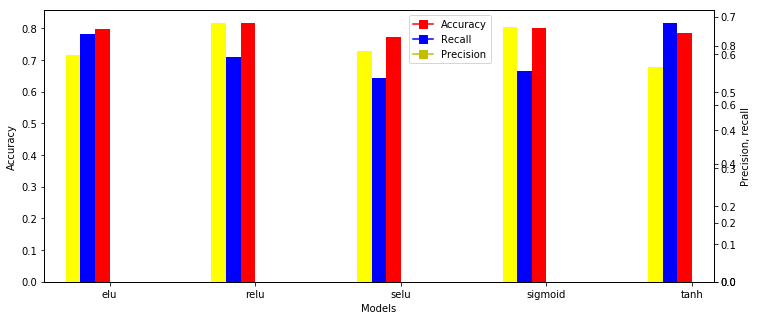

In [68]:
df_activations = pd.read_pickle('df_activations.pkl')
plot_accurracy_prec_roc(df_activations.values, act_funcs)